# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


## Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

Group Members:
* Pedram Zeinalabedin Zadegan
* Mohammad Vanaei
* Atiye Abedinnia

## Seed Class

This class provides methods to generate initial seed patterns. This class does have these functionalities:
* Parse HTML and extract data ([Conwaylife](https://conwaylife.com/patterns/))
* Check the validation of data formation
* Decode `.rle` format
* Display a binary matrix. (Seed)
* Choose from one of 3 `RandomSeed`, `SeedByName` or `SeedByInput` methods

#### What is `.rle`?
RLE stands for **Run Length Encoded** format. It is a file format used for describing cellular automata patterns. The RLE format represents the pattern as a series of characters that describe the location and state of each cell in the pattern. It includes information about the dimensions of the pattern, as well as any comments or meta-data about the pattern. The RLE format is commonly used in conjunction with Conway's Game of Life, which is a popular cellular automaton.

``` 
     |#C This is a glider.                  |0 1 0|      
.rle |x = 3, y = 3             Matrix(3*3): |0 0 1|              
     |bo$2bo$3o                             |1 1 1|
```
![text](https://upload.wikimedia.org/wikipedia/commons/f/f2/Game_of_life_animated_glider.gif "Glider") 

---

#### Constructor
`__init__()`: Initializes a new instance of the seed class, and creates an empty list of pattern names.

#### HTML Parser
`HTMLParser(url, format)`: Takes a URL string and a file format string as input, sends a GET request to the webpage located at the URL, parses its HTML content, and finds all links in the page that end with the specified file format. The method then appends the href attribute of each link to the list of pattern names in the instance.

#### Validate Random Pattern
`validateRandomPattern()`: Generates a random integer between 0 and the length of the pattern names list in the instance, selects the corresponding pattern name, and returns it as a string.

#### validate RLE Format
`validateRLEFormat(rleText)`: Takes a list of strings as input, removes certain characters (such as carriage returns, apostrophes, spaces, and commas) from each string, and concatenates them into a single string that represents an RLE format string.

#### RLE Parser
`RLEParser(response)`: Takes a list of strings (which represent the lines of an RLE file) as input, skips over lines that start with `"#"` or `"x"`, calls `validateRLEFormat` to format the RLE string, and then calls `RLEWrapper` on the formatted RLE string and the original list of strings.

#### RLE Wrapper
`RLEWrapper(RLEForm, lines)`: Takes a string in RLE format and a list of strings (which represent the lines of an RLE file) as input. It uses the RLE string to create a matrix of ones and zeroes, where each one represents a live cell in the initial state of the simulation. It then trims the matrix so that it only includes the rows and columns that contain live cells. Finally, it prints the matrix.

#### Random Seed
`randomSeed()`: Generates a random pattern name from the list of pattern names in the instance, retrieves the corresponding RLE file from the internet, parses it using `RLEParser`, and returns the resulting matrix of live cells.

#### Seed By Name
`seedByName(patternName)`: Takes a pattern name string as input, retrieves the corresponding RLE file from the internet, parses it using RLEParser, and returns the resulting matrix of live cells.

#### Seed By Input
`seedByInput()`: Prompts the user to enter the coordinates of each live cell in the initial state of the simulation, creates a matrix that represents the initial state based on these coordinates, and returns the matrix.

In [5]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import random

class Seed:
    def __init__(self, shape_max):
        self.shape_max = shape_max
        self.patternNames = []
        
    def HTMLParser(self, url, format):
        # Send a GET request to the webpage and parse the HTML content
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all links in the page that end in .rle or .cells and print their href attribute
        for link in soup.find_all('a', href=lambda href: href.endswith(format)):
            self.patternNames.append(link.get('href'))

    def validateRandomPattern(self):
        return self.patternNames[random.randint(0, len(self.patternNames))].replace("'", "")
    
    def validateRLEFormat(self, rleText):
        finalRLE = ''
        for i in range(len(rleText)):
            finalRLE += rleText[i].replace('\r', '').replace( "'", '').replace( " ", '').replace( ",", '')
        return finalRLE
    
    def RLEParser(self, response):
        rleText = []
        for line in response:
            if line.startswith("#"):
                continue
            elif line.startswith("x"):
                continue
            else:
                rleText.append(line)

        validRLE = self.validateRLEFormat(rleText)
        return self.RLEWrapper(validRLE, response)
    
    def RLEWrapper(self, RLEForm, lines):
        # Create matrix
        SHAPE_MAX = (self.shape_max, self.shape_max)
        B = np.zeros(SHAPE_MAX).astype(int)
        
        # Parse String and if the character is a digit, we keep going until we reach 'b' or 'o'
        curX, curY = 0, 0
        qs = ''
        for c in RLEForm:
            # End of String
            if c=='':  
                break

            # Next Line
            if c=='$':
                q = 1 if qs=='' else int(qs)
                curY += q
                curX = 0
                qs = ''

            # Digit (check ascii code for a digit from 0 to 9)
            if ord(c) > 47 and ord(c) < 58:
                qs = qs + c

            # Alive (o) or Dead (b) cell    
            if c == 'b' or c=='o':
                q = 1 if qs=='' else int(qs)
                for i in range(q):
                    B[curX, curY] = False if c=='b' else True
                    curX += 1
                qs = ''
        
        # Reshape B
        if len(np.where(sum(B) > 0)[0]) != 0 and len(np.where(sum(B.T) > 0)[0]) != 0:
            BshapeY = max(np.where(sum(B) > 0)[0]) +1
            BshapeX = max(np.where(sum(B.T) > 0)[0]) +1
            B = B[0:BshapeX, 0:BshapeY]
            
            # Print Result
            for line in lines:
                # print(line)
                if line.startswith("#N"):
                    print(line)
                if line.startswith("#"):
                    continue
                elif line.startswith("x"):
                    continue
                else:
                    print(line)
            print(f'\nMatrix({BshapeX}*{BshapeY}):\n', B.T)
            #print(type(B))
            return B.T
        else:
            self.fetchData()

    def randomSeed(self):
        url = 'https://conwaylife.com/patterns/' + self.validateRandomPattern()
        response = requests.get(url)
        lines = response.text.split('\n')
        return self.RLEParser(lines)
    
    def seedByName(self, patternName):
        url = f'https://conwaylife.com/patterns/{patternName}.rle'
        response = requests.get(url)
        lines = response.text.split('\n')
        return self.RLEParser(lines)

        ### Chosen
        # dragonspullingtoads
        # sawmillexample
    
    def seedByInput():
        end = False
        init = []
        i = 0
        
        while (not end):
            inp = input("Enter location of live cell (x y) (If you are finished type n or N) : ")
            i += 1
            if (inp == 'n' or inp == 'N'):
                end = True
            else:
                inp = inp.split()
                init.append((int(inp[0]), int(inp[1]))) 
        
        zero_state = np.zeros((20,20), dtype = int)
        for ind, val in enumerate(init):
            x, y = val
            zero_state[x-1][y-1] = 1
            
        return zero_state

# GoF Class

This class is for managing GoF generations. This class does have these functionalities:
* get seed to start the evolution of the game
* calculating new state (generation) based of former generation
* generating all the states (max = 100), plot and saves them
* generating `.gif` file from all the states


### Seed
First generation (also called pattern) that starts the game, will be given to the class in the constuctor (as a Numpy array). This seed can be defined manually or it can be generated from ([Conwaylife](https://conwaylife.com/patterns/)) (a randon pattern).

This state is saved as first state in a list to provide possibiity comparing states and also calculting some features of the pattern.
This seed is a matrix consists of 0 and 1 (0 means dead and 1 means live)

### New State (Generation)
Every state is generated based on former state (it would be the seed at first step) and implementing the rules of the game.
First index of all live cells of former state is found.

Then a matrix with the same shape of the seed and with all values set to 0 (which is the score of the cell and this score means how many live cells are around this cell), will be generated. This matrix will be new state.

Score of the all the elements around a live cell will be added by 1. This goes for all live cells.
At the end new state is ready, but it consists of 0 to 8. At this point game rules should be applied. This is done by several masks.

``` 
                    |0      0       0       0       0|      
                    |0   score+1 score+1 score+1    0|      
                    |0   score+1   live  score+1    0|              
                    |0   score+1 score+1 score+1    0|
                    |0      0       0       0       0| 

```


### Check state
At every step, the state is check to see what is situation of this state and what it menas.
* If the new state is equal to former state, it means generations are the same and it will be static, so the process will be stopeed.
* If the process is not static and the new state is same as first state (seed), it means that pattern is an oscillator and process is stopped.
* If it is not static and not oscillator, it would be checked to see if the pattern is a spaceship or not. If the configuration of matrix is like as seed, but not in exact positions, it means that pattern is a spaceship and it is moving.

This comparison is done by Numpy comparison method. `numpy.array_equal()`

### Animating
In every step a binary plot is generated using state matrix and the plot is saved as a `.png` file.
Then gof `.animate()` method can be called to create a `.gif` file from all the steps.

### Pattern Features
By saving all the states, it would be possilbe to know some information about the pattren. This informations include 
* frequency (how many steps is needed to generate first generation), if pattern is oscillator
* occupancy (how many alive cells there are at every step of the game)
* heat (the average number of cells that change state at each generation)
* speed (how many generations are needed to get same configuration), if pattern is spaceship


In [8]:
class gof:
    # instructor of the class that gets seed as input and saves it
    # and also defines step and list of states
    def __init__(self, seed):
        self.first_state = seed
        self.step = 0
        self.states = [seed]
        self.speed = 0
        self.moving_count = 0
        self.situation = ''
        self.format_folder()
    
    # This method calculates new state (generation) based on former state
    def calculate_new_state(self, former_state):
        # Find alive cells
        lives_x = np.where(former_state == 1)[0]
        lives_y = np.where(former_state == 1)[1]
    
        # Initializing new state
        new_state = np.zeros(former_state.shape, dtype = int)
        
        # Calculate score of every cell based on the adjacent live cells
        for i in range(len(lives_x)):
            x = lives_x[i]
            y = lives_y[i]
            new_state[x-1:x+2, y-1:y+2] += 1
            new_state[x][y] -= 1     # Live cell does not affect its own score
        
        # Apply the rules of GoF
        new_state[new_state < 2] = 0
        new_state[new_state > 3] = 0
        new_state[new_state == 3] = 1
        mask = (new_state == 2) & (former_state == 1)
        
        new_state[mask] = 1
        new_state[new_state == 2] = 0
        return new_state
    
    
    # Generating All the steps (Max = 100)
    # - Plots former state and saves it
    # - calls the calculate_new_state to calculate new state
    # - check the situation of the generation (Oscillator, Static) and decide to continue or stop
    def generate_steps(self):
        if (self.step == 0):
            m, n = former_state.shape
            extended_former_state = np.zeros((5*m, 5*n), dtype = int)
            extended_former_state[2*m:3*m, 2*n:3*n] = self.states[self.step]
            # extended_former_state = np.zeros((3*m, 3*n), dtype = int)
            # extended_former_state[m:2*m, n:2*n] = self.states[self.step]
            self.states[self.step] = extended_former_state
            
        self.make_plot(self.states[self.step], self.step)
        new_state = self.calculate_new_state(self.states[self.step])
        self.states.append(new_state)
        self.step += 1
        situation = self.check_state(new_state, self.step)
        if (situation == 'no change'):
            print("Static after",str(self.step+1), " steps.")
            self.make_plot(new_state, self.step)
            return 0
        
        elif (situation == 'oscillator'):
            print("Oscillator pattern, after",str(self.step+1), " steps.")
            self.make_plot(new_state, self.step)
            return self.step
        
        elif (situation == 'moving' and self.moving_count > 3):
            print("Moving Pattern.")
            return self.speed
            
        elif (self.step < 100):
            self.generate_steps()
       
        else:
            print("Done")
            
    
    # This method is for checking the situation (Oscillator, Static)
    def check_state(self, new_state, step):
        if (np.array_equal(new_state, self.states[-2])):  # comapre with previous state
            self.situation = 'no change'
        elif (np.array_equal(new_state, self.states[0])): # compare with first state
            self.situation = 'oscillator'
        elif (self.is_moving(new_state, step) != 0):      # compare configuration with first state
            self.situation = 'moving'
        else:
            self.situation = 'continue'
        return self.situation
    
        
    
    # This method returns if pattern moves or not
    def is_moving(self, new_state, step):
        
        # building a matrix only bounded to live zone (first state)
        first_lives_x = np.where(self.states[0] == 1)[0]
        first_lives_y = np.where(self.states[0] == 1)[1]
        first_state = self.states[0].copy()
        first_true_state = first_state[min(first_lives_x):max(first_lives_x)+1, min(first_lives_y):max(first_lives_y)+1]
        
        # building a matrix only bounded to live zone (new state)
        new_lives_x = np.where(new_state == 1)[0]
        new_lives_y = np.where(new_state == 1)[1]
        n_state = new_state.copy()
        new_true_state = n_state[min(new_lives_x):max(new_lives_x)+1, min(new_lives_y):max(new_lives_y)+1]
            
        if (np.array_equal(first_true_state, new_true_state)):
            self.moving_count += 1
            self.speed = self.moving_count / step    # if the pattern is spaceship, the speed is calculated              
            return step
        return 0
       
        
    # This method is for plotting and saving the figure of the step
    def make_plot(self, state, step):       
        fig, ax = plt.subplots()
        mat = ax.imshow(state, cmap='GnBu', interpolation='nearest')
        path = "output/state" + str(step) + ".png"
        plt.savefig(path)
        plt.close()
              
    
    # This method gives all the .png files and generate .gif file
    def animate(self):
        # Set the directory where the image files are located
        directory = "output/"
        
        # Sort the image files based on their names
        file_names = [f for f in os.listdir(directory) if f.endswith('.png')]
        
        # Sort file names numerically
        file_names_sorted = sorted(file_names, key=lambda x: int(x.split('state')[1].split('.png')[0]))
        
        #print(file_names_sorted)
        # Create a list of images
        images = []
        for filename in file_names_sorted:
            if filename.endswith(".png"):
                # Open the image file using Pillow
                image = Image.open(os.path.join(directory, filename))
                # Add the image to the list
                images.append(image)
        
        # Create the GIF using imageio
        output_file = "output/Gif_Result.gif"
        imageio.mimsave(output_file, images, duration=0.1)
        self.displayGif(output_file)

    # This method gives information about the pattern (Frequency, Heat, Occupancy and Speed)
    def get_info(self):
        if (self.situation == 'no change'):
            print("NO Frequency. \nStatic after",str(self.step), " steps.\n")
        elif (self.situation == 'oscillator'):
            print("Oscillator pattern, \nFrequency: ",str(self.step), "\n")
        elif (self.situation == 'moving'):
            print("This pattern is moving and speed is: ", self.speed, "\n")
        else:
            print("With steps bounded to 100, no frequency (Corrsponding original) and no static situation observed.\n")
        
        
        # Calculating Heat using all steps and differneces of every two steps
        print("Heat:")
        heat_sum = 0
        for i in range(1, len(self.states)):
            dif = self.states[i] - self.states[i-1]
            heat_sum += np.count_nonzero(dif == 1)
            heat_sum += np.count_nonzero(dif == -1)
        heat = heat_sum / (len(self.states) -1)
        print(heat, "\n")
        
        # Calculting Occupancy for every step
        print("Occupancy:")
        for i, state in enumerate(self.states):
            print("step",i,",  occupancy : ", np.count_nonzero(state == 1))

    def format_folder(self):
        folder_path = 'output/'
        # Get a list of all files and subfolders in the folder
        items = os.listdir(folder_path)

        # Loop through the items and delete any file or subfolder
        for item in items:
            # Construct the full path of the item
            item_path = os.path.join(folder_path, item)
            if os.path.isfile(item_path):
                # Delete the file
                os.remove(item_path)
            elif os.path.isdir(item_path):
                # Delete the subfolder recursively
                os.system(f'rm -rf {item_path}')

    def displayGif(self, path):
        from IPython.display import Image
        display(Image(filename= path))

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from PIL import Image
import glob
import time
import os
import math
from PIL import Image
import imageio
from IPython.display import display


seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
#former_state = seed.randomSeed()
former_state = seed.seedByName('132p37')
#former_state = seed.seedByInput()
game = gof(former_state)
game.generate_steps()

#N 132P37
18bo28b$18b3o26b$21bo25b$20b2o25b2$32b2o13b$32b2o13b$26bobo18b$28bo18b
2$22b3o22b$15b2o5bo2bo21b$15b2o5bo3bo20b$5b2o19bo20b$5b2o15bo3bo20b$
22bo2bo8b2o11b$22b3o9b2o11b2$7b2o36b2o$45bob$7bo4b3o28bobob$11bo3bo27b
2o2b$10bo5bo13b3ob3o10b$10bo5bo13bo5bo10b$10b3ob3o13bo5bo10b$2b2o27bo
3bo11b$bobo28b3o4bo7b$bo45b$2o36b2o7b2$11b2o9b3o22b$11b2o8bo2bo22b$20b
o3bo15b2o5b$20bo19b2o5b$20bo3bo5b2o15b$21bo2bo5b2o15b$22b3o22b2$18bo
28b$18bobo26b$13b2o32b$13b2o32b2$25b2o20b$25bo21b$26b3o18b$28bo!

Matrix(47*47):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Oscillator pattern, after 38  steps.


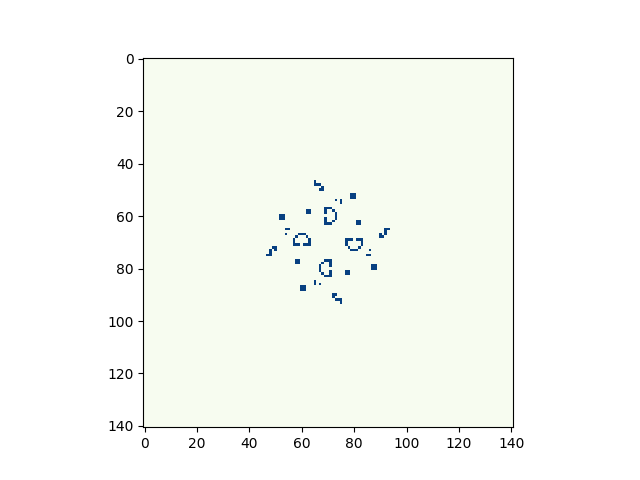

In [10]:
game.animate()

In [ ]:
game.get_info()

## Oscillators

### 1 - Blinker

#N Blinker
3o!

Matrix(3*1):
 [[1 1 1]]
Oscillator pattern, after 3  steps.


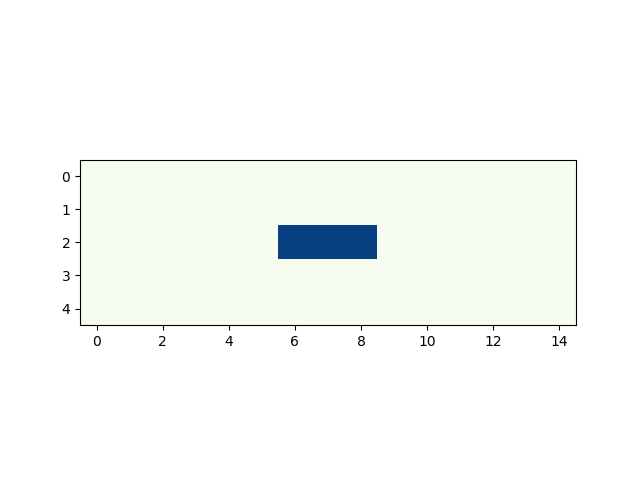

Oscillator pattern, 
Frequency:  2 

Heat:
4.0 

Occupancy:
step 0 ,  occupancy :  3
step 1 ,  occupancy :  3
step 2 ,  occupancy :  3


In [65]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('blinker')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()


### 2 - Toad

#N Toad
b3o$3o!

Matrix(4*2):
 [[0 1 1 1]
 [1 1 1 0]]
Oscillator pattern, after 3  steps.


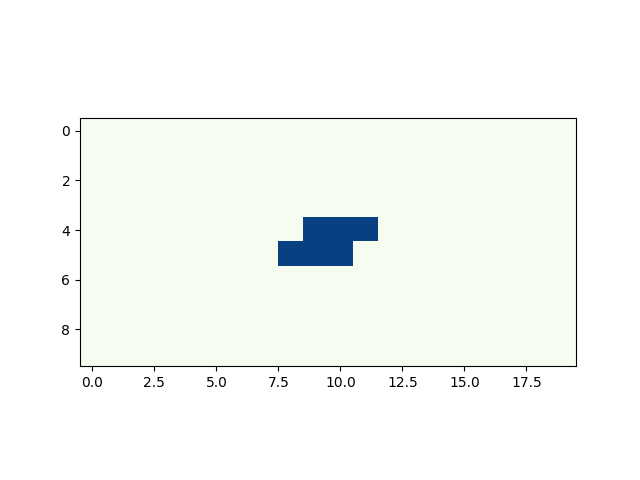

Oscillator pattern, 
Frequency:  2 

Heat:
8.0 

Occupancy:
step 0 ,  occupancy :  6
step 1 ,  occupancy :  6
step 2 ,  occupancy :  6


In [66]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('toad')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()


### 3 - Beacon

#N Beacon
2o2b$o3b$3bo$2b2o!

Matrix(4*4):
 [[1 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 1]]
Oscillator pattern, after 3  steps.


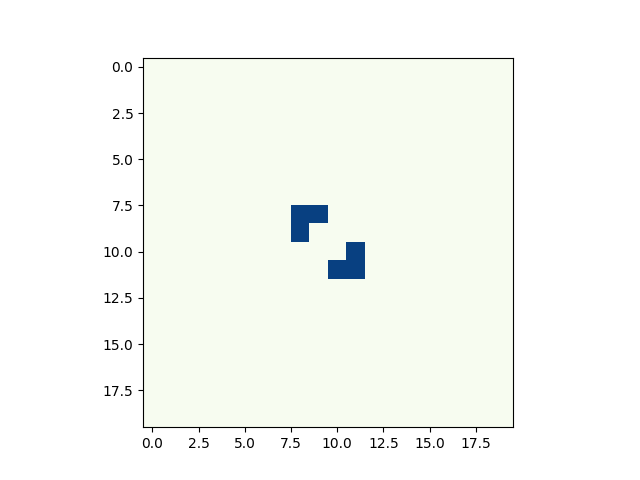

Oscillator pattern, 
Frequency:  2 

Heat:
2.0 

Occupancy:
step 0 ,  occupancy :  6
step 1 ,  occupancy :  8
step 2 ,  occupancy :  6


In [68]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('beacon')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()

### 4 - 132p37

#N 132P37
18bo28b$18b3o26b$21bo25b$20b2o25b2$32b2o13b$32b2o13b$26bobo18b$28bo18b
2$22b3o22b$15b2o5bo2bo21b$15b2o5bo3bo20b$5b2o19bo20b$5b2o15bo3bo20b$
22bo2bo8b2o11b$22b3o9b2o11b2$7b2o36b2o$45bob$7bo4b3o28bobob$11bo3bo27b
2o2b$10bo5bo13b3ob3o10b$10bo5bo13bo5bo10b$10b3ob3o13bo5bo10b$2b2o27bo
3bo11b$bobo28b3o4bo7b$bo45b$2o36b2o7b2$11b2o9b3o22b$11b2o8bo2bo22b$20b
o3bo15b2o5b$20bo19b2o5b$20bo3bo5b2o15b$21bo2bo5b2o15b$22b3o22b2$18bo
28b$18bobo26b$13b2o32b$13b2o32b2$25b2o20b$25bo21b$26b3o18b$28bo!

Matrix(47*47):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Oscillator pattern, after 38  steps.


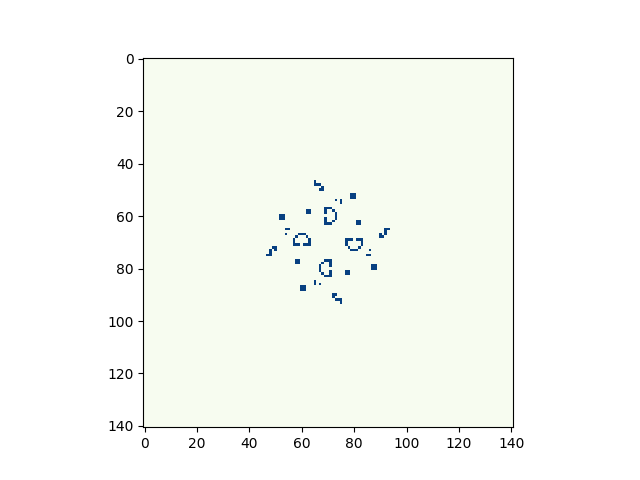

Oscillator pattern, 
Frequency:  37 

Heat:
142.48648648648648 

Occupancy:
step 0 ,  occupancy :  132
step 1 ,  occupancy :  160
step 2 ,  occupancy :  140
step 3 ,  occupancy :  168
step 4 ,  occupancy :  180
step 5 ,  occupancy :  228
step 6 ,  occupancy :  180
step 7 ,  occupancy :  216
step 8 ,  occupancy :  208
step 9 ,  occupancy :  252
step 10 ,  occupancy :  244
step 11 ,  occupancy :  284
step 12 ,  occupancy :  280
step 13 ,  occupancy :  280
step 14 ,  occupancy :  296
step 15 ,  occupancy :  312
step 16 ,  occupancy :  304
step 17 ,  occupancy :  276
step 18 ,  occupancy :  264
step 19 ,  occupancy :  296
step 20 ,  occupancy :  268
step 21 ,  occupancy :  344
step 22 ,  occupancy :  244
step 23 ,  occupancy :  228
step 24 ,  occupancy :  264
step 25 ,  occupancy :  212
step 26 ,  occupancy :  244
step 27 ,  occupancy :  180
step 28 ,  occupancy :  172
step 29 ,  occupancy :  164
step 30 ,  occupancy :  140
step 31 ,  occupancy :  144
step 32 ,  occupancy :  152
step 33 , 

In [14]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('132p37')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()

## Still Lifes

### 1 - Boat

#N Boat
2ob$obo$bo!

Matrix(3*3):
 [[1 1 0]
 [1 0 1]
 [0 1 0]]
Static after 2  steps.


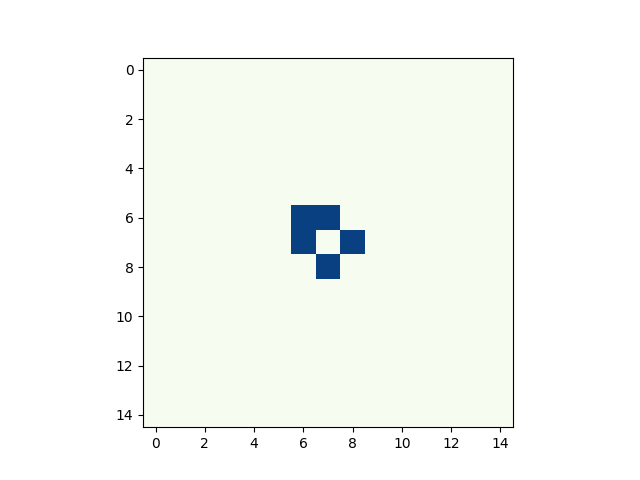

NO Frequency. 
Static after 1  steps.

Heat:
0.0 

Occupancy:
step 0 ,  occupancy :  5
step 1 ,  occupancy :  5


In [71]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('boat')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()

### 1 - Beehive

#N Beehive
b2ob$o2bo$b2o!

Matrix(4*3):
 [[0 1 1 0]
 [1 0 0 1]
 [0 1 1 0]]
Static after 2  steps.


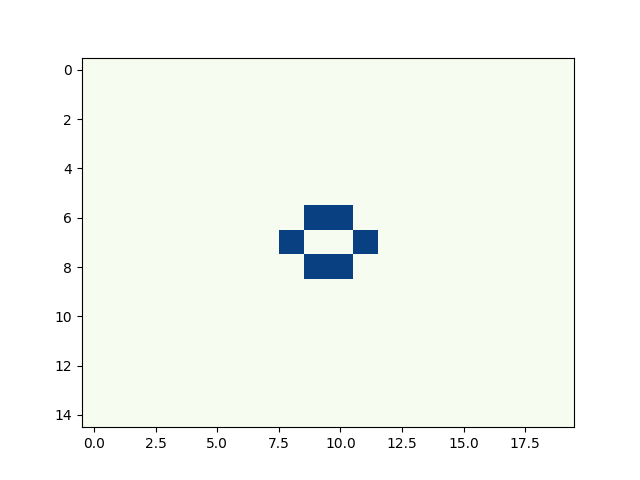

NO Frequency. 
Static after 1  steps.

Heat:
0.0 

Occupancy:
step 0 ,  occupancy :  6
step 1 ,  occupancy :  6


In [75]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('beehive')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()

## Spaceships

### 1- Glider

#N Glider
bob$2bo$3o!

Matrix(3*3):
 [[0 1 0]
 [0 0 1]
 [1 1 1]]
Moving Pattern.


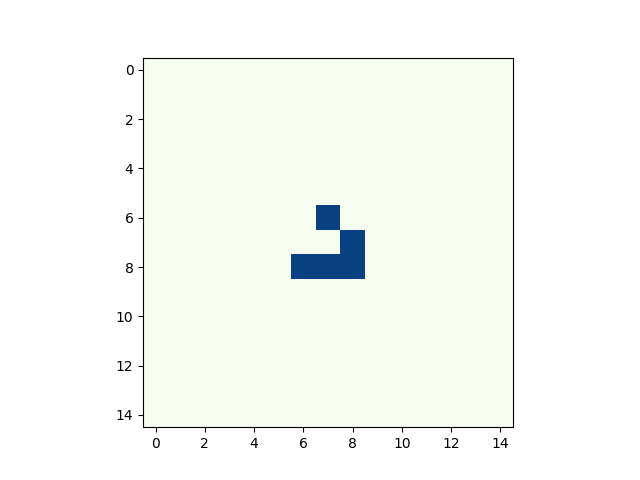

This pattern is moving and speed is:  0.25 

Heat:
4.0 

Occupancy:
step 0 ,  occupancy :  5
step 1 ,  occupancy :  5
step 2 ,  occupancy :  5
step 3 ,  occupancy :  5
step 4 ,  occupancy :  5
step 5 ,  occupancy :  5
step 6 ,  occupancy :  5
step 7 ,  occupancy :  5
step 8 ,  occupancy :  5
step 9 ,  occupancy :  5
step 10 ,  occupancy :  5
step 11 ,  occupancy :  5
step 12 ,  occupancy :  5
step 13 ,  occupancy :  5
step 14 ,  occupancy :  5
step 15 ,  occupancy :  5
step 16 ,  occupancy :  5


In [79]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('glider')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()

### 2 - Lightweight spaceship (LWSS)

#N Lightweight spaceship
bo2bo$o4b$o3bo$4o!

Matrix(5*4):
 [[0 1 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 1]
 [1 1 1 1 0]]
Moving Pattern.


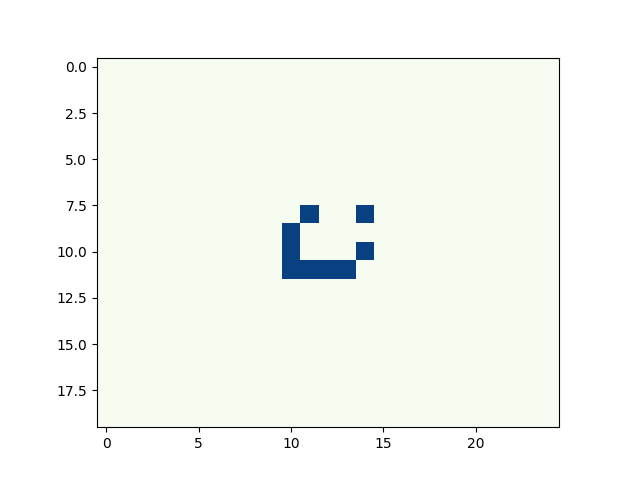

This pattern is moving and speed is:  0.25 

Heat:
11.0 

Occupancy:
step 0 ,  occupancy :  9
step 1 ,  occupancy :  12
step 2 ,  occupancy :  9
step 3 ,  occupancy :  12
step 4 ,  occupancy :  9
step 5 ,  occupancy :  12
step 6 ,  occupancy :  9
step 7 ,  occupancy :  12
step 8 ,  occupancy :  9
step 9 ,  occupancy :  12
step 10 ,  occupancy :  9
step 11 ,  occupancy :  12
step 12 ,  occupancy :  9
step 13 ,  occupancy :  12
step 14 ,  occupancy :  9
step 15 ,  occupancy :  12
step 16 ,  occupancy :  9


In [80]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.seedByName('lwss')
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()

## Random Patterns

#N tnp4v.rle
2$7b3o2$6bo3bo$2b2obo5bob2o$2bo11bo$3b2o7b2o$3o2b7o2b3o$o2bo9bo2bo$b2o
5bo5b2o$7b3o!

Matrix(17*12):
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0]
 [1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]]
Oscillator pattern, after 5  steps.


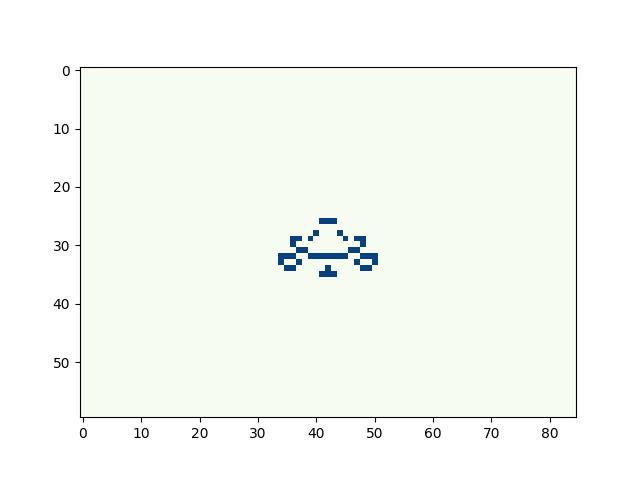

Oscillator pattern, 
Frequency:  4 

Heat:
30.0 

Occupancy:
step 0 ,  occupancy :  42
step 1 ,  occupancy :  52
step 2 ,  occupancy :  42
step 3 ,  occupancy :  52
step 4 ,  occupancy :  42


In [83]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.randomSeed()
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()

#N p50piheptominohassler5.rle
8bo$8b3o$11bo$10b2o$o$3o10b2o$3bo8bobo$2b2o8b2o3$19b3o3$12bobo$11bo3b
o$8bo3bobo$7bobo3bo$6bo3bo$7bobo3$3o3$8b2o8b2o$7bobo8bo$7b2o10b3o$21b
o$10b2o$10bo$11b3o$13bo!

Matrix(22*32):
 [[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 

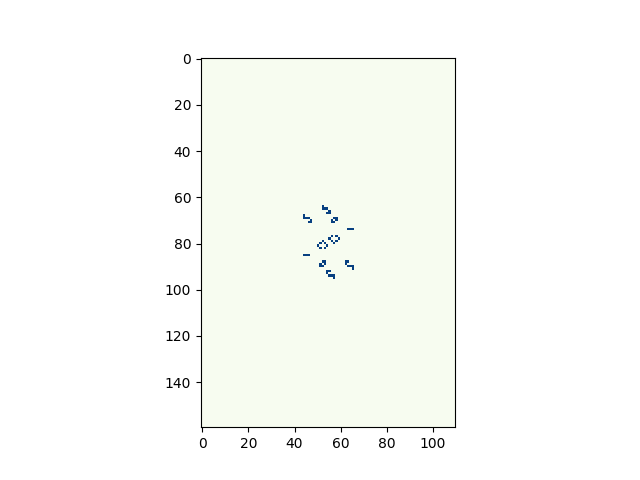

Oscillator pattern, 
Frequency:  50 

Heat:
38.4 

Occupancy:
step 0 ,  occupancy :  60
step 1 ,  occupancy :  62
step 2 ,  occupancy :  64
step 3 ,  occupancy :  66
step 4 ,  occupancy :  70
step 5 ,  occupancy :  62
step 6 ,  occupancy :  66
step 7 ,  occupancy :  68
step 8 ,  occupancy :  68
step 9 ,  occupancy :  72
step 10 ,  occupancy :  72
step 11 ,  occupancy :  74
step 12 ,  occupancy :  78
step 13 ,  occupancy :  76
step 14 ,  occupancy :  86
step 15 ,  occupancy :  84
step 16 ,  occupancy :  100
step 17 ,  occupancy :  94
step 18 ,  occupancy :  112
step 19 ,  occupancy :  112
step 20 ,  occupancy :  134
step 21 ,  occupancy :  118
step 22 ,  occupancy :  142
step 23 ,  occupancy :  126
step 24 ,  occupancy :  134
step 25 ,  occupancy :  114
step 26 ,  occupancy :  86
step 27 ,  occupancy :  88
step 28 ,  occupancy :  92
step 29 ,  occupancy :  102
step 30 ,  occupancy :  104
step 31 ,  occupancy :  116
step 32 ,  occupancy :  100
step 33 ,  occupancy :  112
step 34 ,  occup

In [85]:
seed = Seed(500)
seed.HTMLParser(url= 'https://conwaylife.com/patterns/', format= '.rle')
former_state = seed.randomSeed()
game = gof(former_state)
game.generate_steps()
game.animate()
game.get_info()